<a href="https://colab.research.google.com/github/rbarman/lfa/blob/master/lesson2/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply stochastic gradient descent to find the relationship between admission test scores and gpa


In [0]:
import json
from fastai.basics import *
from random import randint

**Get Data**

In [0]:
! pip install -q kaggle
! mkdir ~/.kaggle
with open('kaggle.json', 'w') as outfile:
    json.dump({"username":"rbarman","key":"6b45e726526d300c1a3e4622a866a6e0"}, outfile)
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!mkdir data/
!kaggle datasets download mohansacharya/graduate-admissions --unzip -p data/
!ls data/

  0% 0.00/9.36k [00:00<?, ?B/s]
100% 9.36k/9.36k [00:00<00:00, 7.54MB/s]
Admission_Predict.csv  Admission_Predict_Ver1.1.csv


In [0]:
df = pd.read_csv('data/Admission_Predict_Ver1.1.csv')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


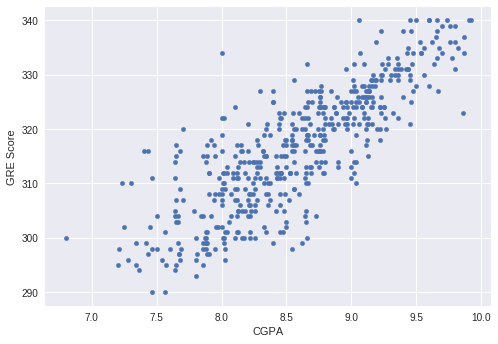

In [6]:
df.plot(x='CGPA',y='GRE Score',kind='scatter');

There is a general linear trend. The goal is to use stochastic gradient descent to find the line that best fits the data


**Set up Tensors**

In [7]:
x = torch.ones(len(df),2)
x[:,0] = torch.tensor(df['CGPA'])
x[:5]

tensor([[9.6500, 1.0000],
        [8.8700, 1.0000],
        [8.0000, 1.0000],
        [8.6700, 1.0000],
        [8.2100, 1.0000]])

In [8]:
y = torch.tensor(df['GRE Score'].values,dtype=torch.float32)
y[:5]

tensor([337., 324., 316., 322., 314.])

**Try random parameter values**

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

y_hat:tensor([8.6500, 7.8700, 7.0000, 7.6700, 7.2100])
error: 95532.8984375


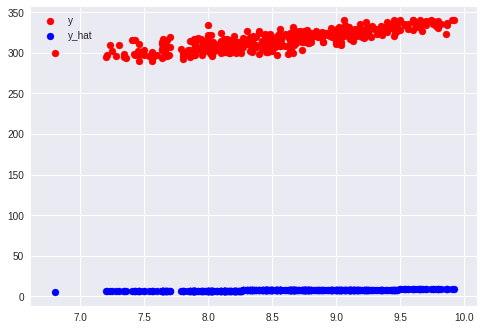

In [10]:
a = tensor(1.,-1)
y_hat = x@a
print(f'y_hat:{y_hat[0:5]}')
print(f'error: {mse(y_hat,y)}')

_, ax = plt.subplots()
ax.scatter(x[:,0],y, c='red', label = 'y')
ax.scatter(x[:,0],y_hat, c='blue', label = 'y_hat')

plt.legend()
plt.show()

This random guess is very bad - the error is very high and we can see that the y_hat values are too low. We will need to do stochastic gradient descent to find the best parameter values

**Stochastic Gradient Descent**

In [0]:
def sgd(x,y,lr,epochs,bs):
  '''Find best parameters that minimize mse'''
  
  a = nn.Parameter(tensor(1.,-1));
  
  random.seed(9000)
  rand_idx = [randint(0,len(y)-1) for i in range(0,bs)]
    
  for epoch in range(epochs):
    y_hat = x[rand_idx]@a
    loss = mse(y[rand_idx], y_hat)
    # TODO: print counter should be dynamic
    if epoch % 10000 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()
  print('final',loss)
  return a

def plot_predictions(x,y,params):
  '''plot predictions with real data'''
  _, ax = plt.subplots()
  ax.scatter(x[:,0],y, c='red', label = 'y')
  ax.scatter(x[:,0],x@params, c='blue', label = 'y_hat')

  plt.legend()
  plt.show()

In [56]:
params = sgd(x,y,1e-2,100000,32)

tensor(94671.6953, grad_fn=<MeanBackward1>)
tensor(66.6848, grad_fn=<MeanBackward1>)
tensor(49.9648, grad_fn=<MeanBackward1>)
tensor(44.9456, grad_fn=<MeanBackward1>)
tensor(43.4390, grad_fn=<MeanBackward1>)
tensor(42.9867, grad_fn=<MeanBackward1>)
tensor(42.8510, grad_fn=<MeanBackward1>)
tensor(42.8102, grad_fn=<MeanBackward1>)
tensor(42.7980, grad_fn=<MeanBackward1>)
tensor(42.7944, grad_fn=<MeanBackward1>)
final tensor(42.7933, grad_fn=<MeanBackward1>)


The loss is able to drop significantly with a batch size of 32

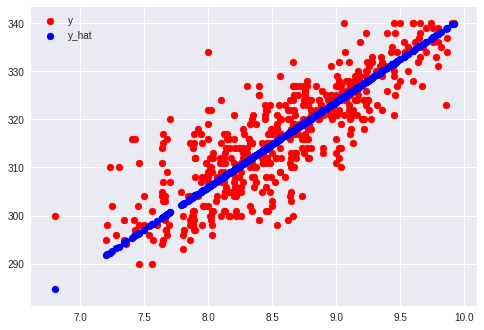

In [57]:
plot_predictions(x,y,params)

Model is able to show the general linear trend of the data

In [58]:
params = sgd(x,y,1e-2,100000,64)

tensor(94921.8594, grad_fn=<MeanBackward1>)
tensor(57.3011, grad_fn=<MeanBackward1>)
tensor(42.6155, grad_fn=<MeanBackward1>)
tensor(40.0465, grad_fn=<MeanBackward1>)
tensor(39.5971, grad_fn=<MeanBackward1>)
tensor(39.5185, grad_fn=<MeanBackward1>)
tensor(39.5048, grad_fn=<MeanBackward1>)
tensor(39.5024, grad_fn=<MeanBackward1>)
tensor(39.5020, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
final tensor(39.5019, grad_fn=<MeanBackward1>)


A higher batch size is able to reduce the loss even more. Batch size is definitely a hyper parameter to consider - what is the optimal size? Also are we at the global minimum of loss or just a local  minimum?

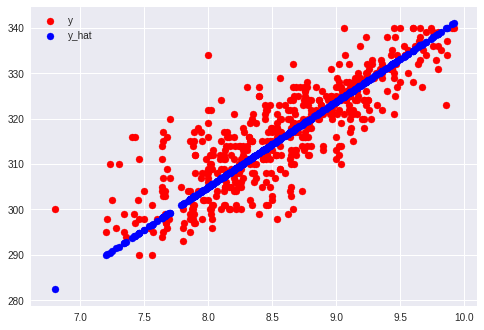

In [59]:
plot_predictions(x,y,params)

Lets try these batch sizes with more epochs

In [64]:
params = sgd(x,y,1e-2,1000000,32)

tensor(94671.6953, grad_fn=<MeanBackward1>)
tensor(66.6848, grad_fn=<MeanBackward1>)
tensor(49.9648, grad_fn=<MeanBackward1>)
tensor(44.9456, grad_fn=<MeanBackward1>)
tensor(43.4390, grad_fn=<MeanBackward1>)
tensor(42.9867, grad_fn=<MeanBackward1>)
tensor(42.8510, grad_fn=<MeanBackward1>)
tensor(42.8102, grad_fn=<MeanBackward1>)
tensor(42.7980, grad_fn=<MeanBackward1>)
tensor(42.7944, grad_fn=<MeanBackward1>)
tensor(42.7933, grad_fn=<MeanBackward1>)
tensor(42.7929, grad_fn=<MeanBackward1>)
tensor(42.7928, grad_fn=<MeanBackward1>)
tensor(42.7928, grad_fn=<MeanBackward1>)
tensor(42.7928, grad_fn=<MeanBackward1>)
tensor(42.7928, grad_fn=<MeanBackward1>)


KeyboardInterrupt: ignored

 Stopping execution early. The model is converging to a loss of 42.7928 which is still higher than the loss from the 64 batch size run

In [62]:
params = sgd(x,y,1e-2,1000000,64)

tensor(94921.8594, grad_fn=<MeanBackward1>)
tensor(57.3011, grad_fn=<MeanBackward1>)
tensor(42.6155, grad_fn=<MeanBackward1>)
tensor(40.0465, grad_fn=<MeanBackward1>)
tensor(39.5971, grad_fn=<MeanBackward1>)
tensor(39.5185, grad_fn=<MeanBackward1>)
tensor(39.5048, grad_fn=<MeanBackward1>)
tensor(39.5024, grad_fn=<MeanBackward1>)
tensor(39.5020, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)
tensor(39.5019, grad_fn=<MeanBackward1>)


KeyboardInterrupt: ignored

Stopping early. Model is converging to a loss of 39.5019. This is the same loss as the 64 batch run with 10 times less epochs. Still unclear if we are in the global or a local minimum